# DBSCAN

另一个非常有用的聚类算法是DBSCAN(density-based spatial clustering of applications with noise，即“具有噪声的基于密度的空间聚类应用”)。DBSCAN的主要优点是它不需要用户先验的设置簇的个数，可以划分具有复杂形状的簇，还可以找出不属于任何簇的点。DBSCAN比凝聚聚类和k 均值稍慢，但仍可以扩展到相对较大的数据集。

DBSCAN的**原理**是识别特征空间的“拥挤”区域中的点，在这些区域中许多数据点靠近在起。这些区域被称为特征空间中的密集 (dense) 区域。DBSCAN背后的思想是，簇形成数据的密集区域，并由相对较空的区域分隔开。

在密集区域内的点被称为**核心样本** (core sample，或核心点)，它们的定义如下。DBSCAN有两个参数:min_samples和eps。如果在距一个给定数据点eps的距离内至少有minsamples 个数据点，那么这个数据点就是核心样本。DBSCAN将彼此距离小于eps的核心样本放到同一个簇中。

算法首先任意选取一个点，然后找到到这个点的距离小于等于 eps 的所有的点。如果距起始点的距离在eps之内的数据点个数小于min_samples，那么这个点被标记为噪声(noise)，也就是说它不属于任何簇。如果距离在eps 之内的数据点个数大于minsamples，则这个点被标记为核心样本，并被分配一个新的簇标签。然后访问该点的所有邻居 (在距离 eps 以内)。如果它们还没有被分配一个簇，那么就将刚刚创建的新的簇标签分配给它们。如果它们是核心样本，那么就依次访向其邻居，以此类推。簇逐渐增大.直到在簇的eps 距离内没有更多的核心样本为止。然后选取另一个尚未被访问过的点并重复相同的过程。

最后，一共有三种类型的点:核心点、与核心点的距离在 eps 之内的点 (叫作边界点boundary point)和噪声。如果DBSCAN算法在特定数据集上多次运行，那么核心点的聚类始终相同，同样的点也始终被标记为噪声。但边界点可能与不止一个簇的核心样本相邻。因此，边界点所属的簇依赖于数据点的访问顺序。一般来说只有很少的边界点，这种对访问顺序的轻度依赖并不重要。

我们将 DBSCAN 应用于演示凝聚聚类的模拟数据集。与凝聚聚类类似，DBSCAN 也不允许对新的测试数据进行预测，所以我们将使用 fit_predict 方法来执行聚类并返回簇标签。

In [1]:
from sklearn.cluster import DBSCAN
from sklearn.datasets import make_blobs

X, y = make_blobs(random_state=0, n_features=12)
dbscan = DBSCAN()
clusters = dbscan.fit_predict(X)
print("cluster memberships:\n{}".format(clusters))

cluster memberships:
[-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1
 -1 -1 -1 -1]


如你所见，所有数据点都被分配了标签 -1，这代表噪声。这是eps和min_samples 默认参数设置的结果，对于小型的玩具数据集并没有调节这些参数。min_samples 和eps 取不同值时的簇分类如下所示

min_samples: 2 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 2 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 2 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 2 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 3 eps: 1.000000  cluster: [-1  0  0 -1  0 -1  1  1  0  1 -1 -1]
min_samples: 3 eps: 1.500000  cluster: [0 1 1 1 1 0 2 2 1 2 2 0]
min_samples: 3 eps: 2.000000  cluster: [0 1 1 1 1 0 0 0 1 0 0 0]
min_samples: 3 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]
min_samples: 5 eps: 1.000000  cluster: [-1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1 -1]
min_samples: 5 eps: 1.500000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 2.000000  cluster: [-1  0  0  0  0 -1 -1 -1  0 -1 -1 -1]
min_samples: 5 eps: 3.000000  cluster: [0 0 0 0 0 0 0 0 0 0 0 0]


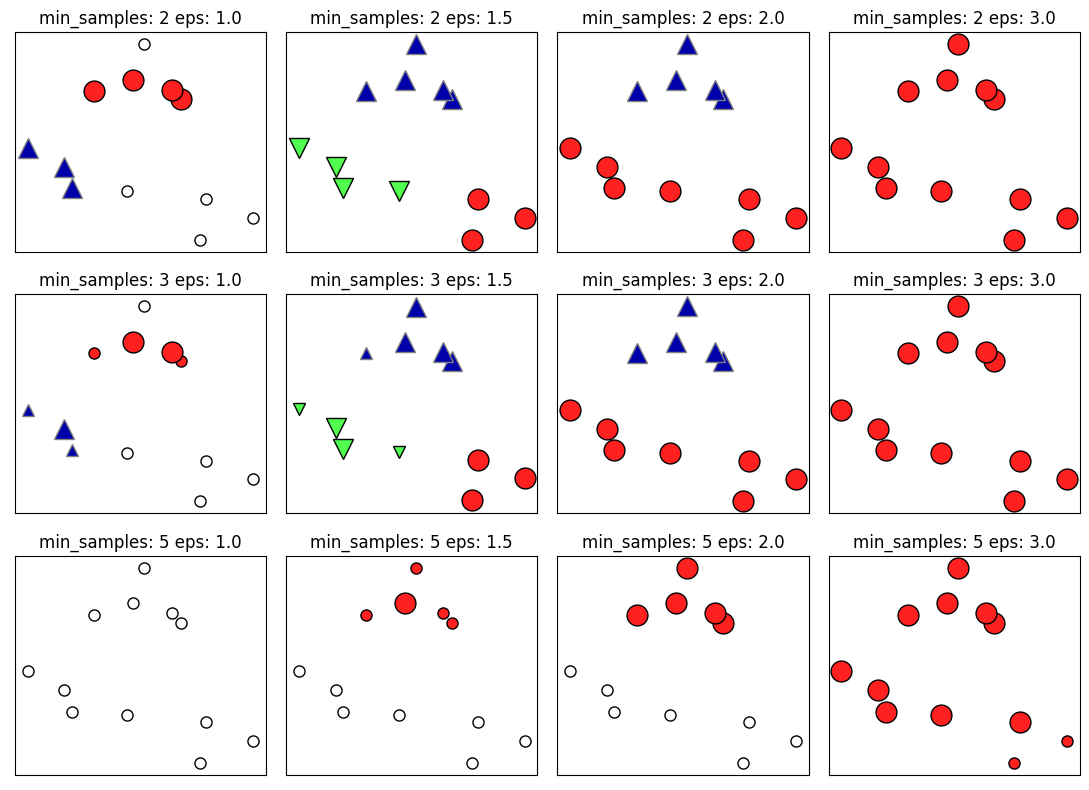

In [2]:
import mglearn
mglearn.plots.plot_dbscan()

在这张图中，属于簇的点是实心的，而噪声点则显示为空心的。核心样本显示为较大的标记，而边界点则显示为较小的标记。增大 eps (在图中从左到右)，更多的点会被包含在一个簇中。这让簇变大，但可能也会导致多个簇合并成一个。增大min_samples (在图中从上到下)，核心点会变得更少，更多的点被标记为噪声

参数 eps 在某种程度上更加重要，因为它决定了点与点之间“接近”的含义。将eps 设置得非常小，意味着没有点是核心样本，可能会导致所有点都被标记为噪声。将 eps 设置得非常大，可能会导致所有点形成单个簇。

设置 min_samples主要是为了判断稀疏区域内的点被标记为异常值还是形成自己的簇。如果增大min_samples，任何一个包含少于min_samples 个样本的族现在将被标记为噪声。因此，min_samples决定簇的最小尺寸。在图3-37中eps=1.5时，从min_samples=3到minsamples=5，你可以清楚地看到这一点。min_samples=3时有三个簇:一个包含4个点，个包含5个点，一个包含3个点。min_samples=5时，两个较小的簇 (分别包含3个点和4个点)现在被标记为噪声，只保留包含 5个样本的簇。

虽然DBSCAN不需要显式地设置簇的个数，但设置 eps 可以隐式地控制找到的族的个数。使用standardScaler或MinMaxScaler 对数据进行缩放之后，有时会更容易找到eps的较好取值，因为使用这些缩放技术将确保所有特征具有相似的范围。

Text(0, 0.5, 'Feature 1')

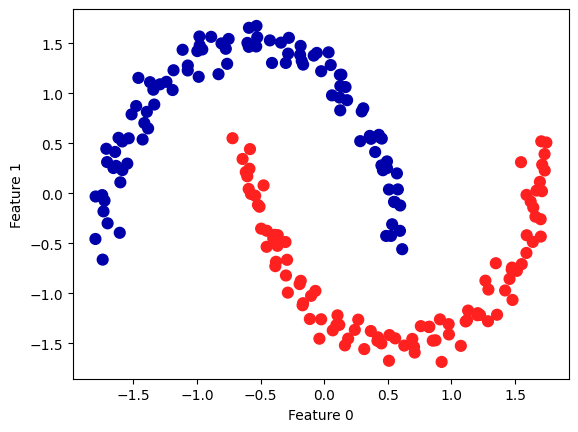

In [3]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons
import matplotlib.pyplot as plt

X, y = make_moons(n_samples=200, noise=0.05, random_state=0)
# 将数据缩放为平均值为0，方差为1
scaler = StandardScaler()
scaler.fit(X)
X_scaled = scaler.transform(X)

dbscan = DBSCAN()
clusters = dbscan.fit_predict(X_scaled)
# 绘制簇分配
plt.scatter(X_scaled[:, 0], X_scaled[:, 1], c=clusters, cmap=mglearn.cm2, s=60)
plt.xlabel("Feature 0")
plt.ylabel("Feature 1")

由于算法找到了我们想要的簇的个数 (2个)，因此参数设置的效果似乎很好。如果将 eps减小到0.2(默认值为0.5)，我们将会得到8个簇，这显然太多了。将eps 增大到0,7则会导致只有一个簇。

在使用 DBSCAN时，你需要谨慎处理返回的簇分配。如果使用簇标签对另一个数据进行索引，那么使用-1表示噪声可能会产生意料之外的结果